In [100]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# load the dataset
df = pd.read_csv('req_names.csv')

In [102]:
print(df.head())

   Unnamed: 0                 ID          Name
0           0    Adriana Lima0_0  Adriana Lima
1           1  Adriana Lima101_3  Adriana Lima
2           2  Adriana Lima102_4  Adriana Lima
3           3  Adriana Lima103_5  Adriana Lima
4           4  Adriana Lima104_6  Adriana Lima


In [103]:
# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

In [104]:
print(df)

                      ID          Name
0        Adriana Lima0_0  Adriana Lima
1      Adriana Lima101_3  Adriana Lima
2      Adriana Lima102_4  Adriana Lima
3      Adriana Lima103_5  Adriana Lima
4      Adriana Lima104_6  Adriana Lima
...                  ...           ...
17529   tom ellis96_4426     tom ellis
17530   tom ellis97_4427     tom ellis
17531   tom ellis98_4428     tom ellis
17532   tom ellis99_4429     tom ellis
17533    tom ellis9_4416     tom ellis

[17534 rows x 2 columns]


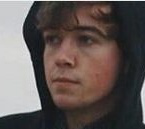

In [105]:
# displaying an image from the given path
from PIL import Image
img = Image.open('105_classes_pins_dataset/'+'pins_'+df['Name'][300]+'/'+df['ID'][300]+'.jpg')
img

In [106]:
# getting the resolution of the images from the dataset by iterating through the dataset
# and appending the resolution to a list
res = []
for i in range(len(df)):
    img = Image.open('105_classes_pins_dataset/'+'pins_'+df['Name'][i]+'/'+df['ID'][i]+'.jpg')
    res.append(img.size)

In [107]:
# printing the resolution of the images
print(res)

[(550, 668), (302, 320), (146, 155), (209, 225), (102, 108), (174, 184), (365, 387), (255, 266), (302, 320), (146, 155), (302, 320), (468, 547), (121, 128), (464, 558), (341, 558), (146, 154), (212, 225), (302, 320), (437, 462), (251, 266), (175, 184), (251, 266), (564, 802), (465, 554), (251, 266), (251, 270), (464, 547), (302, 320), (302, 320), (121, 128), (329, 387), (302, 320), (251, 266), (121, 129), (302, 320), (251, 266), (333, 387), (550, 550), (429, 554), (102, 108), (251, 266), (102, 108), (510, 547), (302, 320), (564, 799), (102, 108), (209, 221), (122, 128), (251, 266), (209, 221), (302, 320), (216, 264), (121, 129), (437, 456), (500, 559), (437, 463), (302, 320), (175, 184), (102, 108), (310, 387), (436, 462), (365, 387), (145, 154), (146, 152), (121, 128), (251, 266), (365, 387), (302, 320), (145, 154), (175, 184), (436, 463), (564, 802), (102, 108), (564, 668), (102, 108), (365, 387), (302, 320), (212, 221), (174, 184), (251, 266), (365, 387), (102, 108), (102, 108), (56

In [108]:
# appending the resolution to the dataframe as width and height
df['width'] = [i[0] for i in res]
df['height'] = [i[1] for i in res]

In [109]:
print(df)

                      ID          Name  width  height
0        Adriana Lima0_0  Adriana Lima    550     668
1      Adriana Lima101_3  Adriana Lima    302     320
2      Adriana Lima102_4  Adriana Lima    146     155
3      Adriana Lima103_5  Adriana Lima    209     225
4      Adriana Lima104_6  Adriana Lima    102     108
...                  ...           ...    ...     ...
17529   tom ellis96_4426     tom ellis    145     154
17530   tom ellis97_4427     tom ellis    146     154
17531   tom ellis98_4428     tom ellis    422     463
17532   tom ellis99_4429     tom ellis    251     266
17533    tom ellis9_4416     tom ellis    212     221

[17534 rows x 4 columns]


In [110]:
# displaying the number of images for each resolution combination
df.groupby(['width', 'height']).size()
# sorting them in descending order
df.groupby(['width', 'height']).size().sort_values(ascending=False)


width  height
102    108       2524
302    320       1528
251    266       1318
209    221       1032
365    387        926
                 ... 
264    298          1
263    387          1
256    320          1
255    320          1
302    282          1
Length: 691, dtype: int64

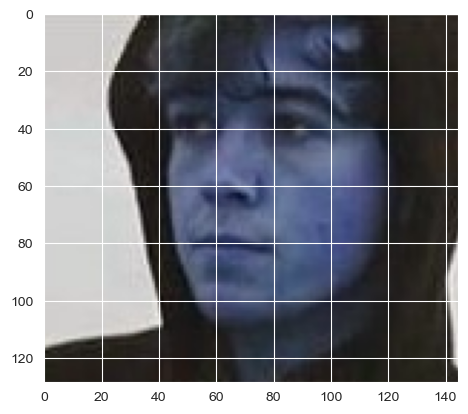

In [111]:
# displaying an image using opencv
import cv2
img = cv2.imread('105_classes_pins_dataset/'+'pins_'+df['Name'][300]+'/'+df['ID'][300]+'.jpg')
plt.imshow(img)

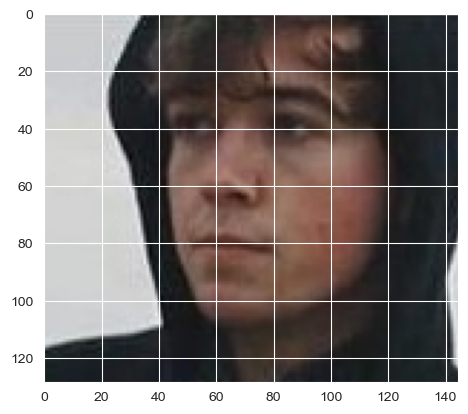

In [112]:
# fixing the colour channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [113]:
# getting all the images from the folder
import os
# getting all the images from the folder
images = []
for i in range(len(df)):
    img = cv2.imread('105_classes_pins_dataset/'+'pins_'+df['Name'][i]+'/'+df['ID'][i]+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
print(images)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [114]:
# # slicing the first 10 images
# images = images[:10]

In [115]:
# converting all the images to grayscale
gray_images = []
for i in range(len(images)):
    gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

(108, 102)


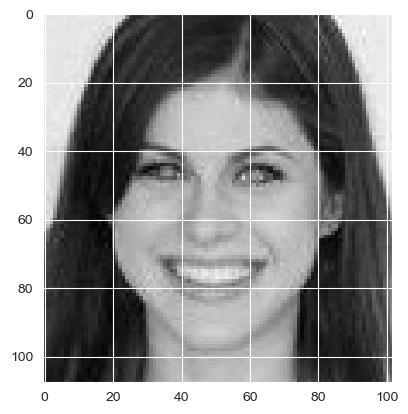

In [116]:
# showing a random image
plt.imshow(gray_images[500], cmap='gray')
# show the dimensions of the image
print(gray_images[500].shape)

In [117]:
# using frontal face recognition
# using frontal face recognition to detect the faces in the images
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = []
for i in range(len(gray_images)):
    faces.append(face_cascade.detectMultiScale(gray_images[i], 1.1, 4))
print(faces)

[array([[ 62,  96, 457, 457]], dtype=int32), array([[ 31,  45, 220, 220]], dtype=int32), array([[ 17,  19, 103, 103]], dtype=int32), array([[ 60, 147,  75,  75],
       [ 19,  30, 156, 156]], dtype=int32), array([[ 8, 13, 81, 81]], dtype=int32), array([[ 19,  24, 134, 134]], dtype=int32), array([[ 22,  37, 281, 281]], dtype=int32), array([[ 28,  33, 193, 193]], dtype=int32), array([[ 32,  52, 219, 219]], dtype=int32), array([[  7,  18, 119, 119]], dtype=int32), array([[ 19,  27, 245, 245]], dtype=int32), array([[ 56,  64, 385, 385]], dtype=int32), array([[19, 20, 84, 84]], dtype=int32), (), (), array([[ 19,  12, 116, 116]], dtype=int32), array([[ 31,  22, 156, 156]], dtype=int32), (), array([[ 53,  54, 334, 334]], dtype=int32), array([[ 31,  39, 181, 181]], dtype=int32), array([[ 20,  19, 128, 128]], dtype=int32), array([[ 17,  41, 181, 181]], dtype=int32), array([[ 79, 179, 483, 483]], dtype=int32), array([[ 84,  99, 352, 352]], dtype=int32), array([[ 39,  40, 180, 180]], dtype=int32)

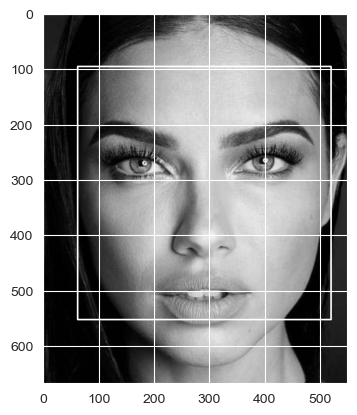

In [118]:
# showing the face in the grayscale image
for i in range(len(faces)):
    for (x, y, w, h) in faces[i]:
        cv2.rectangle(gray_images[i], (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(gray_images[0], cmap='gray')

In [119]:
# finding the statistics of number of faces in the images
face_count = []
for i in range(len(faces)):
    face_count.append(len(faces[i]))
# grouping the face count and displaying the number of images for each face count
df['face_count'] = face_count
df.groupby(['face_count']).size()

face_count
0     2788
1    14730
2       16
dtype: int64

In [120]:
# dropping the faces from the grayscale images which have other than 1 face
for i in range(len(faces)):
    if len(faces[i]) != 1:
        gray_images[i] = None
        faces[i] = None

In [121]:
# showing the dataframe
print(df)

                      ID          Name  width  height  face_count
0        Adriana Lima0_0  Adriana Lima    550     668           1
1      Adriana Lima101_3  Adriana Lima    302     320           1
2      Adriana Lima102_4  Adriana Lima    146     155           1
3      Adriana Lima103_5  Adriana Lima    209     225           2
4      Adriana Lima104_6  Adriana Lima    102     108           1
...                  ...           ...    ...     ...         ...
17529   tom ellis96_4426     tom ellis    145     154           1
17530   tom ellis97_4427     tom ellis    146     154           1
17531   tom ellis98_4428     tom ellis    422     463           1
17532   tom ellis99_4429     tom ellis    251     266           0
17533    tom ellis9_4416     tom ellis    212     221           1

[17534 rows x 5 columns]


In [122]:
# removing the none values from the grayscale images
gray_images = [i for i in gray_images if i is not None]
# removing the none values from the faces
faces = [i for i in faces if i is not None]

In [123]:
# removing the rows which have face count other than 1
df = df[df['face_count'] == 1]

In [124]:
# resetting the index
df.reset_index(drop=True, inplace=True)

In [125]:
print(len(gray_images))
print(len(df))
print(len(faces))

14730
14730
14730


In [126]:
# displaying the dataframe
print(df)

                      ID          Name  width  height  face_count
0        Adriana Lima0_0  Adriana Lima    550     668           1
1      Adriana Lima101_3  Adriana Lima    302     320           1
2      Adriana Lima102_4  Adriana Lima    146     155           1
3      Adriana Lima104_6  Adriana Lima    102     108           1
4      Adriana Lima105_7  Adriana Lima    174     184           1
...                  ...           ...    ...     ...         ...
14725   tom ellis95_4425     tom ellis    145     154           1
14726   tom ellis96_4426     tom ellis    145     154           1
14727   tom ellis97_4427     tom ellis    146     154           1
14728   tom ellis98_4428     tom ellis    422     463           1
14729    tom ellis9_4416     tom ellis    212     221           1

[14730 rows x 5 columns]


In [127]:
# grouping the images by the name and displaying the number of images for each name in descending order
df.groupby(['Name']).size().sort_values(ascending=False)

Name
Alexandra Daddario    209
Katherine Langford    203
elizabeth olsen       198
Adriana Lima          194
Logan Lerman          193
                     ... 
Brian J. Smith         84
Maria Pedraza          83
Lionel Messi           75
Morgan Freeman         71
Taylor Swift           71
Length: 105, dtype: int64

In [128]:
# deleting the images to free up the memory
del images

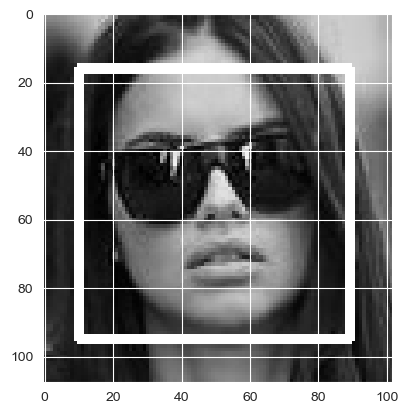

In [129]:
# displaying gray images
plt.imshow(gray_images[100], cmap='gray')

In [130]:
# cropping all the images to their faces
cropped_images = []
for i in range(len(gray_images)):
    for (x, y, w, h) in faces[i]:
        cropped_images.append(gray_images[i][y:y+h, x:x+w])


(79, 79)


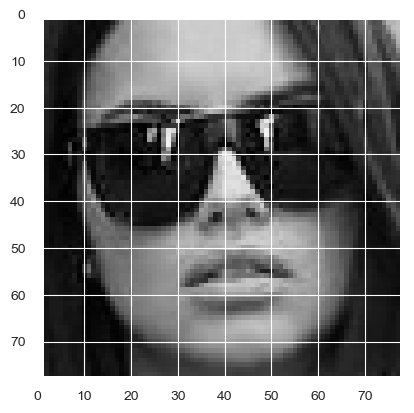

In [131]:
# displaying the cropped image
plt.imshow(cropped_images[100], cmap='gray')
# displaying the dimensions of the cropped image
print(cropped_images[100].shape)

In [132]:
# resizing all the images to 100x100
resized_images = []
for i in range(len(cropped_images)):
    resized_images.append(cv2.resize(cropped_images[i], (100, 100)))

In [133]:
# showing the shape of all resized images by grouping them by their shape
for i in range(len(resized_images)):
    print(resized_images[i].shape)

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)

In [134]:
# updating the dataframe height and width
df['width'] = [i.shape[0] for i in resized_images]
df['height'] = [i.shape[1] for i in resized_images]

In [135]:
# displaying the dataframe
print(df)

                      ID          Name  width  height  face_count
0        Adriana Lima0_0  Adriana Lima    100     100           1
1      Adriana Lima101_3  Adriana Lima    100     100           1
2      Adriana Lima102_4  Adriana Lima    100     100           1
3      Adriana Lima104_6  Adriana Lima    100     100           1
4      Adriana Lima105_7  Adriana Lima    100     100           1
...                  ...           ...    ...     ...         ...
14725   tom ellis95_4425     tom ellis    100     100           1
14726   tom ellis96_4426     tom ellis    100     100           1
14727   tom ellis97_4427     tom ellis    100     100           1
14728   tom ellis98_4428     tom ellis    100     100           1
14729    tom ellis9_4416     tom ellis    100     100           1

[14730 rows x 5 columns]


In [136]:
# putting all the resized images in a folder
for i in range(len(resized_images)):
    cv2.imwrite('resized_images/'+str(i)+'.jpg', resized_images[i])

In [137]:
# adding the images to the dataframe
df['image'] = resized_images
# displaying the dataframe
print(df)

                      ID          Name  width  height  face_count  \
0        Adriana Lima0_0  Adriana Lima    100     100           1   
1      Adriana Lima101_3  Adriana Lima    100     100           1   
2      Adriana Lima102_4  Adriana Lima    100     100           1   
3      Adriana Lima104_6  Adriana Lima    100     100           1   
4      Adriana Lima105_7  Adriana Lima    100     100           1   
...                  ...           ...    ...     ...         ...   
14725   tom ellis95_4425     tom ellis    100     100           1   
14726   tom ellis96_4426     tom ellis    100     100           1   
14727   tom ellis97_4427     tom ellis    100     100           1   
14728   tom ellis98_4428     tom ellis    100     100           1   
14729    tom ellis9_4416     tom ellis    100     100           1   

                                                   image  
0      [[98, 55, 55, 57, 55, 59, 57, 59, 72, 97, 111,...  
1      [[255, 255, 255, 255, 255, 255, 255, 255, 255,

In [138]:
# getting the intervals of different names in the dataframe
name_intervals = []
for i in range(len(df)):
    if i == 0:
        name_intervals.append([0, 0])
    elif df['Name'][i] != df['Name'][i-1]:
        name_intervals.append([i, i])
    else:
        name_intervals[-1][1] = i

# displaying the intervals
print(name_intervals)

[[0, 193], [194, 315], [316, 524], [525, 628], [629, 741], [742, 920], [921, 1092], [1093, 1185], [1186, 1313], [1314, 1419], [1420, 1504], [1505, 1592], [1593, 1769], [1770, 1853], [1854, 2001], [2002, 2124], [2125, 2266], [2267, 2432], [2433, 2572], [2573, 2657], [2658, 2816], [2817, 2940], [2941, 3039], [3040, 3182], [3183, 3324], [3325, 3493], [3494, 3611], [3612, 3785], [3786, 3958], [3959, 4112], [4113, 4269], [4270, 4384], [4385, 4522], [4523, 4673], [4674, 4823], [4824, 4988], [4989, 5122], [5123, 5245], [5246, 5345], [5346, 5507], [5508, 5610], [5611, 5772], [5773, 5975], [5976, 6117], [6118, 6269], [6270, 6455], [6456, 6580], [6581, 6730], [6731, 6805], [6806, 6998], [6999, 7146], [7147, 7310], [7311, 7393], [7394, 7534], [7535, 7686], [7687, 7773], [7774, 7955], [7956, 8085], [8086, 8239], [8240, 8404], [8405, 8475], [8476, 8582], [8583, 8734], [8735, 8879], [8880, 8987], [8988, 9092], [9093, 9239], [9240, 9379], [9380, 9539], [9540, 9653], [9654, 9751], [9752, 9870], [9871,

In [139]:
# dividing the name_intervals into 4 equal parts
# dividing the name_intervals into 4 equal parts
name_intervals_1 = name_intervals[:int(len(name_intervals)/4)]
name_intervals_2 = name_intervals[int(len(name_intervals)/4):int(len(name_intervals)/2)]
name_intervals_3 = name_intervals[int(len(name_intervals)/2):int(3*len(name_intervals)/4)]
name_intervals_4 = name_intervals[int(3*len(name_intervals)/4):]

In [140]:
print(name_intervals_1)

[[0, 193], [194, 315], [316, 524], [525, 628], [629, 741], [742, 920], [921, 1092], [1093, 1185], [1186, 1313], [1314, 1419], [1420, 1504], [1505, 1592], [1593, 1769], [1770, 1853], [1854, 2001], [2002, 2124], [2125, 2266], [2267, 2432], [2433, 2572], [2573, 2657], [2658, 2816], [2817, 2940], [2941, 3039], [3040, 3182], [3183, 3324], [3325, 3493]]


In [141]:
print(name_intervals_2)

[[3494, 3611], [3612, 3785], [3786, 3958], [3959, 4112], [4113, 4269], [4270, 4384], [4385, 4522], [4523, 4673], [4674, 4823], [4824, 4988], [4989, 5122], [5123, 5245], [5246, 5345], [5346, 5507], [5508, 5610], [5611, 5772], [5773, 5975], [5976, 6117], [6118, 6269], [6270, 6455], [6456, 6580], [6581, 6730], [6731, 6805], [6806, 6998], [6999, 7146], [7147, 7310]]


In [142]:
print(name_intervals_3)

[[7311, 7393], [7394, 7534], [7535, 7686], [7687, 7773], [7774, 7955], [7956, 8085], [8086, 8239], [8240, 8404], [8405, 8475], [8476, 8582], [8583, 8734], [8735, 8879], [8880, 8987], [8988, 9092], [9093, 9239], [9240, 9379], [9380, 9539], [9540, 9653], [9654, 9751], [9752, 9870], [9871, 10056], [10057, 10197], [10198, 10338], [10339, 10475], [10476, 10657], [10658, 10797]]


In [143]:
print(name_intervals_4)

[[10798, 10868], [10869, 11027], [11028, 11168], [11169, 11318], [11319, 11473], [11474, 11592], [11593, 11701], [11702, 11846], [11847, 12007], [12008, 12123], [12124, 12287], [12288, 12463], [12464, 12651], [12652, 12748], [12749, 12901], [12902, 13036], [13037, 13234], [13235, 13409], [13410, 13521], [13522, 13666], [13667, 13818], [13819, 13912], [13913, 14099], [14100, 14286], [14287, 14428], [14429, 14595], [14596, 14729]]


In [144]:
# taking all the file names from the images folder
file_names = os.listdir('Images')
print(file_names)

['4217.jpg', '10321.jpg', '11981.jpg', '11759.jpg', '4571.jpg', '14635.jpg', '4565.jpg', '12522.jpg', '3544.jpg', '9069.jpg', '5653.jpg', '5647.jpg', '4559.jpg', '7050.jpg', '3550.jpg', '9928.jpg', '638.jpg', '9096.jpg', '13827.jpg', '9914.jpg', '2464.jpg', '10123.jpg', '12720.jpg', '6616.jpg', '11229.jpg', '10889.jpg', '11201.jpg', '13364.jpg', '10686.jpg', '1810.jpg', '3961.jpg', '10692.jpg', '3791.jpg', '1838.jpg', '8983.jpg', '6762.jpg', '2262.jpg', '10725.jpg', '4149.jpg', '5257.jpg', '13576.jpg', '8773.jpg', '7440.jpg', '6038.jpg', '5531.jpg', '3815.jpg', '3801.jpg', '5280.jpg', '8968.jpg', '5294.jpg', '12442.jpg', '2712.jpg', '8565.jpg', '7642.jpg', '12481.jpg', '11822.jpg', '9690.jpg', '7859.jpg', '764.jpg', '4389.jpg', '2920.jpg', '1583.jpg', '11823.jpg', '9691.jpg', '995.jpg', '7870.jpg', '11189.jpg', '13775.jpg', '11176.jpg', '10268.jpg', '4438.jpg', '1540.jpg', '4410.jpg', '12331.jpg', '9652.jpg', '14032.jpg', '8558.jpg', '5295.jpg', '8969.jpg', '201.jpg', '10903.jpg', '109

In [145]:
# stripping .jpg from the file names
file_names = [i[:-4] for i in file_names]
print(file_names)

['4217', '10321', '11981', '11759', '4571', '14635', '4565', '12522', '3544', '9069', '5653', '5647', '4559', '7050', '3550', '9928', '638', '9096', '13827', '9914', '2464', '10123', '12720', '6616', '11229', '10889', '11201', '13364', '10686', '1810', '3961', '10692', '3791', '1838', '8983', '6762', '2262', '10725', '4149', '5257', '13576', '8773', '7440', '6038', '5531', '3815', '3801', '5280', '8968', '5294', '12442', '2712', '8565', '7642', '12481', '11822', '9690', '7859', '764', '4389', '2920', '1583', '11823', '9691', '995', '7870', '11189', '13775', '11176', '10268', '4438', '1540', '4410', '12331', '9652', '14032', '8558', '5295', '8969', '201', '10903', '10917', '12866', '3800', '14581', '14595', '8941', '1030', '11360', '5530', '6039', '7333', '9478', '8996', '598', '8028', '9444', '4160', '3790', '6830', '10877', '8809', '14393', '13403', '8174', '4000', '11228', '6617', '6171', '2303', '89', '9901', '2840', '1391', '9915', '11943', '1420', '4558', '2129', '5646', '10308', 

In [146]:
# converting the file names to integers and ignoring the names which are not integers
file_names = [int(i) for i in file_names if i.isdigit()]
print(file_names)

[4217, 10321, 11981, 11759, 4571, 14635, 4565, 12522, 3544, 9069, 5653, 5647, 4559, 7050, 3550, 9928, 638, 9096, 13827, 9914, 2464, 10123, 12720, 6616, 11229, 10889, 11201, 13364, 10686, 1810, 3961, 10692, 3791, 1838, 8983, 6762, 2262, 10725, 4149, 5257, 13576, 8773, 7440, 6038, 5531, 3815, 3801, 5280, 8968, 5294, 12442, 2712, 8565, 7642, 12481, 11822, 9690, 7859, 764, 4389, 2920, 1583, 11823, 9691, 995, 7870, 11189, 13775, 11176, 10268, 4438, 1540, 4410, 12331, 9652, 14032, 8558, 5295, 8969, 201, 10903, 10917, 12866, 3800, 14581, 14595, 8941, 1030, 11360, 5530, 6039, 7333, 9478, 8996, 598, 8028, 9444, 4160, 3790, 6830, 10877, 8809, 14393, 13403, 8174, 4000, 11228, 6617, 6171, 2303, 89, 9901, 2840, 1391, 9915, 11943, 1420, 4558, 2129, 5646, 10308, 5652, 1434, 2115, 10452, 14634, 8438, 2673, 4570, 11758, 11028, 1378, 14636, 10450, 11982, 9056, 60, 48, 11014, 3553, 5644, 11772, 7047, 1436, 5650, 10478, 4228, 12509, 8412, 14193, 10493, 9081, 161, 607, 2842, 4764, 6173, 14352, 6615, 10120,

In [147]:
# storing the unfiltered dataframe by deep copying the dataframe
df_unfiltered = df.copy(deep=True)

In [148]:
# dropping the rows in the dataframe which have index which are not in the file_names list
df = df[df.index.isin(file_names)]

In [149]:
# finding the size of the dataframe
print(len(df))

2212


In [150]:
print(df)

                       ID          Name  width  height  face_count  \
0         Adriana Lima0_0  Adriana Lima    100     100           1   
2       Adriana Lima102_4  Adriana Lima    100     100           1   
4       Adriana Lima105_7  Adriana Lima    100     100           1   
16     Adriana Lima120_22  Adriana Lima    100     100           1   
26      Adriana Lima12_21  Adriana Lima    100     100           1   
...                   ...           ...    ...     ...         ...   
14690    tom ellis32_4378     tom ellis    100     100           1   
14696    tom ellis43_4388     tom ellis    100     100           1   
14697    tom ellis44_4389     tom ellis    100     100           1   
14709    tom ellis71_4404     tom ellis    100     100           1   
14729     tom ellis9_4416     tom ellis    100     100           1   

                                                   image  
0      [[98, 55, 55, 57, 55, 59, 57, 59, 72, 97, 111,...  
2      [[255, 255, 255, 255, 255, 255, 25

In [151]:
# splitting the dataframe into train and test from the dataframe
# importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['image'],df['Name'], test_size = 0.25, random_state = 42)


In [152]:
# displaying the train and test dataframes
print(X_train)
print(X_test)
print(y_train)
print(y_test)

12947    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
5638     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
6513     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
10588    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
4011     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
                               ...                        
10191    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
7389     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
7549     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
8552     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
6148     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: image, Length: 1659, dtype: object
6134     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
8586     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
9412     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3999     [[254, 240, 239, 240, 237, 237, 237, 239, 237,...
8425     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
               

In [153]:
# flattening the images
X_train = [i.flatten() for i in X_train]
X_test = [i.flatten() for i in X_test]

In [154]:
# implementing pca on the train data
# importing the PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

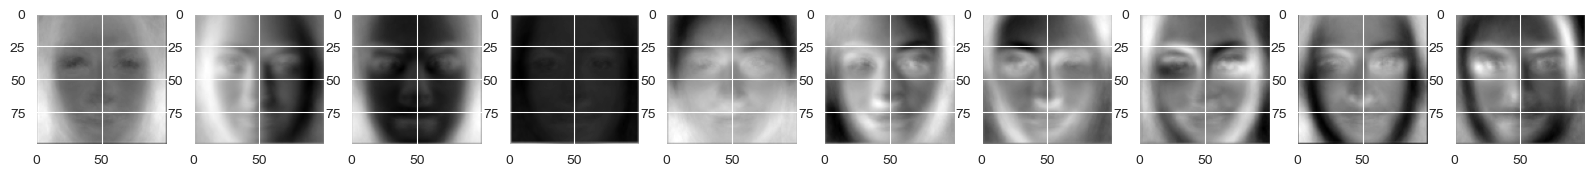

In [155]:
# showing the Eigen faces
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(pca.components_[i].reshape(100, 100), cmap='gray')

In [156]:
# printing the number of components
print(pca.n_components_)

259


In [157]:
# transforming the train and test data
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [158]:
# applying 1-NN on the train and test data
# importing the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [159]:
# predicting the test data
y_pred = knn.predict(X_test)

In [160]:
# displaying the accuracy
print(knn.score(X_test, y_test))


0.13562386980108498


In [161]:
# applying logistic regression on the train and test data
# importing the LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
y_pred = log_reg.predict(X_test)

In [163]:
print(log_reg.score(X_test, y_test))

0.3616636528028933


In [164]:
# function to return accuracy in 1-NN and Logistic Regression
def acc_fun(image,name):
    # dividing the dataframe into train and test from the dataframe
    # importing the train_test_split from sklearn
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
    image,name, test_size = 0.25, random_state = 42)
    # flattening the images
    X_train = [i.flatten() for i in X_train]
    X_test = [i.flatten() for i in X_test]
    # applying PCA on the train data
    # importing the PCA from sklearn
    from sklearn.decomposition import PCA
    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    # transforming the train and test data
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    # applying 1-NN on the train and test data
    # importing the KNeighborsClassifier from sklearn
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    # predicting the test data
    y_pred = knn.predict(X_test)
    # applying logistic regression on the train and test data
    # importing the LogisticRegression from sklearn
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    # predicting the test data
    y_pred = log_reg.predict(X_test)
    return(knn.score(X_test, y_test),log_reg.score(X_test, y_test))

In [165]:
# picking 2 random names form the dataframe and storing them in a list
import random
random_names = random.sample(list(df['Name'].unique()),2)
knn_2_acc,log_2_acc = acc_fun(df[df['Name'].isin(random_names)]['image'],df[df['Name'].isin(random_names)]['Name'])
print(knn_2_acc,log_2_acc)

0.9166666666666666 0.9166666666666666


In [166]:
# picking 4 random names form the dataframe and storing them in a list
random_names = random.sample(list(df['Name'].unique()),4)
knn_4_acc,log_4_acc = acc_fun(df[df['Name'].isin(random_names)]['image'],df[df['Name'].isin(random_names)]['Name'])
print(knn_4_acc,log_4_acc)

0.7222222222222222 0.8888888888888888


In [167]:
# picking 8 random names form the dataframe and storing them in a list
random_names = random.sample(list(df['Name'].unique()),8)
knn_8_acc,log_8_acc = acc_fun(df[df['Name'].isin(random_names)]['image'],df[df['Name'].isin(random_names)]['Name'])
print(knn_8_acc,log_8_acc)

0.3673469387755102 0.673469387755102


In [168]:
# picking 16 random names form the dataframe and storing them in a list
random_names = random.sample(list(df['Name'].unique()),16)
knn_16_acc,log_16_acc = acc_fun(df[df['Name'].isin(random_names)]['image'],df[df['Name'].isin(random_names)]['Name'])
print(knn_16_acc,log_16_acc)

0.25 0.4891304347826087


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
# picking 32 random names form the dataframe and storing them in a list
random_names = random.sample(list(df['Name'].unique()),32)
knn_32_acc,log_32_acc = acc_fun(df[df['Name'].isin(random_names)]['image'],df[df['Name'].isin(random_names)]['Name'])
print(knn_32_acc,log_32_acc)

0.25477707006369427 0.49044585987261147


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
# picking 64 random names form the dataframe and storing them in a list
random_names = random.sample(list(df['Name'].unique()),64)
knn_64_acc,log_64_acc = acc_fun(df[df['Name'].isin(random_names)]['image'],df[df['Name'].isin(random_names)]['Name'])
print(knn_64_acc,log_64_acc)

0.16119402985074627 0.4208955223880597


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
knn_all_acc,log_all_acc = acc_fun(df['image'],df['Name'])
print(knn_all_acc,log_all_acc)

0.13562386980108498 0.3616636528028933


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


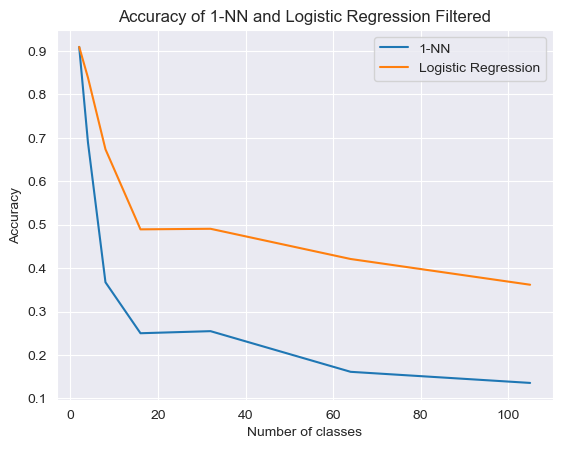

In [191]:
# plotting the accuracy of 1-NN and Logistic Regression
import matplotlib.pyplot as plt
plt.plot([2,4,8,16,32,64,105], [knn_2_acc,knn_4_acc,knn_8_acc,knn_16_acc,knn_32_acc,knn_64_acc,knn_all_acc], label='1-NN')
plt.plot([2,4,8,16,32,64,105], [log_2_acc,log_4_acc,log_8_acc,log_16_acc,log_32_acc,log_64_acc,log_all_acc], label='Logistic Regression')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN and Logistic Regression Filtered')
plt.legend()
plt.show()

In [183]:
# using the unfiltered data to get the accuracy plot
# picking 2 random names form the  unfiltered dataframe and storing them in a list
random_names = random.sample(list(df_unfiltered['Name'].unique()),2)
knn_2_acc_uf,log_2_acc_uf = acc_fun(df_unfiltered[df_unfiltered['Name'].isin(random_names)]['image'],df_unfiltered[df_unfiltered['Name'].isin(random_names)]['Name'])
print(knn_2_acc_uf,log_2_acc_uf)

0.85 0.925


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [186]:
# picking 4 random names form the unfiltered dataframe and storing them in a list
random_names = random.sample(list(df_unfiltered['Name'].unique()),4)
knn_4_acc_uf,log_4_acc_uf = acc_fun(df_unfiltered[df_unfiltered['Name'].isin(random_names)]['image'],df_unfiltered[df_unfiltered['Name'].isin(random_names)]['Name'])
print(knn_4_acc_uf,log_4_acc_uf)

0.6371681415929203 0.8141592920353983


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
# picking 8 random names form the unfiltered dataframe and storing them in a list
random_names = random.sample(list(df_unfiltered['Name'].unique()),8)
knn_8_acc_uf,log_8_acc_uf = acc_fun(df_unfiltered[df_unfiltered['Name'].isin(random_names)]['image'],df_unfiltered[df_unfiltered['Name'].isin(random_names)]['Name'])
print(knn_8_acc_uf,log_8_acc_uf)

0.4570446735395189 0.6391752577319587


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
# picking 16 random names form the unfiltered dataframe and storing them in a list
random_names = random.sample(list(df_unfiltered['Name'].unique()),16)
knn_16_acc_uf,log_16_acc_uf = acc_fun(df_unfiltered[df_unfiltered['Name'].isin(random_names)]['image'],df_unfiltered[df_unfiltered['Name'].isin(random_names)]['Name'])
print(knn_16_acc_uf,log_16_acc_uf)

0.4115702479338843 0.5553719008264463


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
# picking 32 random names form the unfiltered dataframe and storing them in a list
random_names = random.sample(list(df_unfiltered['Name'].unique()),32)
knn_32_acc_uf,log_32_acc_uf = acc_fun(df_unfiltered[df_unfiltered['Name'].isin(random_names)]['image'],df_unfiltered[df_unfiltered['Name'].isin(random_names)]['Name'])
print(knn_32_acc_uf,log_32_acc_uf)


0.2371308016877637 0.4


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
# picking 64 random names form the unfiltered dataframe and storing them in a list
# picking 64 random names form the unfiltered dataframe and storing them in a list
random_names = random.sample(list(df_unfiltered['Name'].unique()),64)
knn_64_acc_uf,log_64_acc_uf = acc_fun(df_unfiltered[df_unfiltered['Name'].isin(random_names)]['image'],df_unfiltered[df_unfiltered['Name'].isin(random_names)]['Name'])
print(knn_64_acc_uf,log_64_acc_uf)

0.2009782125389062 0.33659404179635394


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [180]:
knn_all_acc_uf,log_all_acc_uf = acc_fun(df['image'],df['Name'])
print(knn_all_acc_uf,log_all_acc_uf)

0.13562386980108498 0.3616636528028933


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


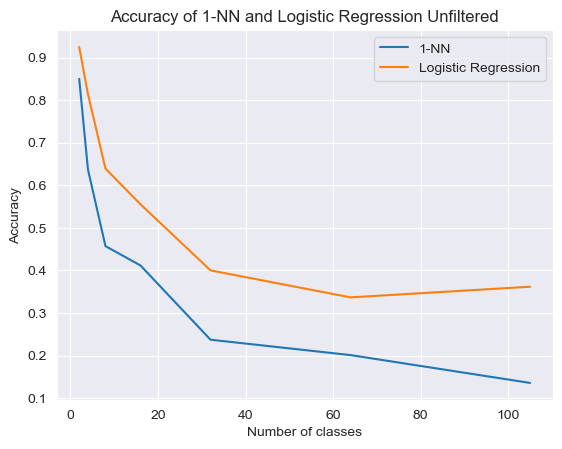

In [190]:
# plotting the accuracy of 1-NN and Logistic Regression
import matplotlib.pyplot as plt
plt.plot([2,4,8,16,32,64,105], [knn_2_acc_uf,knn_4_acc_uf,knn_8_acc_uf,knn_16_acc_uf,knn_32_acc_uf,knn_64_acc_uf,knn_all_acc_uf], label='1-NN')
plt.plot([2,4,8,16,32,64,105], [log_2_acc_uf,log_4_acc_uf,log_8_acc_uf,log_16_acc_uf,log_32_acc_uf,log_64_acc_uf,log_all_acc_uf], label='Logistic Regression')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN and Logistic Regression Unfiltered')
plt.legend()
plt.show()


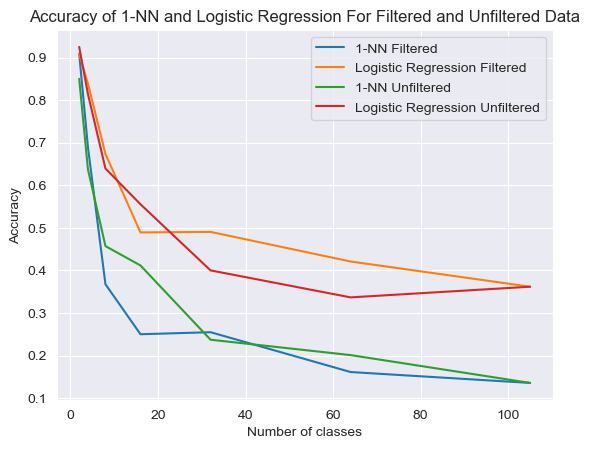

In [189]:
# plotting the accuracy of 1-NN and Logistic Regression for filtered and unfiltered data
import matplotlib.pyplot as plt
plt.plot([2,4,8,16,32,64,105], [knn_2_acc,knn_4_acc,knn_8_acc,knn_16_acc,knn_32_acc,knn_64_acc,knn_all_acc], label='1-NN Filtered')
plt.plot([2,4,8,16,32,64,105], [log_2_acc,log_4_acc,log_8_acc,log_16_acc,log_32_acc,log_64_acc,log_all_acc], label='Logistic Regression Filtered')
plt.plot([2,4,8,16,32,64,105], [knn_2_acc_uf,knn_4_acc_uf,knn_8_acc_uf,knn_16_acc_uf,knn_32_acc_uf,knn_64_acc_uf,knn_all_acc_uf], label='1-NN Unfiltered')
plt.plot([2,4,8,16,32,64,105], [log_2_acc_uf,log_4_acc_uf,log_8_acc_uf,log_16_acc_uf,log_32_acc_uf,log_64_acc_uf,log_all_acc_uf], label='Logistic Regression Unfiltered')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN and Logistic Regression For Filtered and Unfiltered Data')
plt.legend()
plt.show()